In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [18]:
from sklearn.datasets import make_classification

In [20]:
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [29]:
df=pd.DataFrame(X)
df[2]=y
df.head()

,0,1,2
0,0.962308,0.386037,1
1,-0.597594,0.614891,1
2,-0.848288,-0.895479,0
3,0.098976,3.046752,1
4,0.795015,-0.773264,0


In [27]:
X[:10]

array([[ 0.96230833,  0.38603675],
       [-0.59759445,  0.61489085],
       [-0.84828807, -0.89547943],
       [ 0.09897563,  3.04675212],
       [ 0.79501497, -0.77326351],
       [ 0.49111882,  1.781156  ],
       [-0.06571019,  0.90897467],
       [ 0.93045019,  0.9105158 ],
       [ 1.15078403,  0.89060801],
       [-0.37217372,  1.14540349]])

In [23]:
y[:10]

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0])

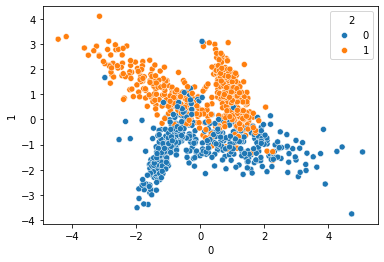

In [31]:
sns.scatterplot(x=df[0],y=df[1],hue=df[2])
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=24)

In [33]:
from sklearn.svm import SVC

In [35]:
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [36]:
svc.coef_

array([[0.33327042, 1.79016359]])

In [37]:
y_pred = svc.predict(X_test)

In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90        94
           1       0.91      0.91      0.91       106

    accuracy                           0.91       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.91      0.91      0.91       200



# Hyperparameter Tuning

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1,1,10,50],
              'gamma':[1,0.1,0.01,0.001],
              'kernel':['linear']}

In [41]:
grid = GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=23)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START C=0.1, gamma=1, kernel=linear..............................
[CV 1/5; 1/16] END C=0.1, gamma=1, kernel=linear;, score=0.881 total time=   0.0s
[CV 2/5; 1/16] START C=0.1, gamma=1, kernel=linear..............................
[CV 2/5; 1/16] END C=0.1, gamma=1, kernel=linear;, score=0.894 total time=   0.0s
[CV 3/5; 1/16] START C=0.1, gamma=1, kernel=linear..............................
[CV 3/5; 1/16] END C=0.1, gamma=1, kernel=linear;, score=0.844 total time=   0.0s
[CV 4/5; 1/16] START C=0.1, gamma=1, kernel=linear..............................
[CV 4/5; 1/16] END C=0.1, gamma=1, kernel=linear;, score=0.863 total time=   0.0s
[CV 5/5; 1/16] START C=0.1, gamma=1, kernel=linear..............................
[CV 5/5; 1/16] END C=0.1, gamma=1, kernel=linear;, score=0.887 total time=   0.0s
[CV 1/5; 2/16] START C=0.1, gamma=0.1, kernel=linear............................
[CV 1/5; 2/16] END C=0.1, gamma=0.1, kernel

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 50], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear']},
             verbose=23)